# Ejercicio 4 - Laplaciano

In [2]:
import cv2 as cv

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

### Carga de la imagen

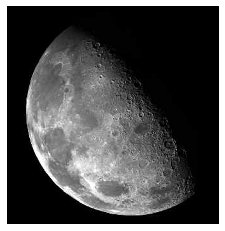

In [12]:
img = cv.imread('../resources/moon.png', cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

## Aplicacion del Laplaciano

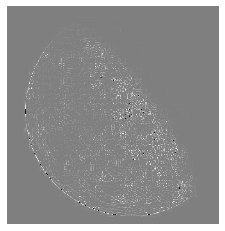

In [23]:
kernel = np.ones((3,3))
kernel[1,1] = -8
filtered_img = cv.filter2D(img, -1, kernel)

plt.imshow(filtered_img + 127, cmap='gray')
plt.axis('off')
plt.show()
